In [57]:
import Pkg
Pkg.add("SimpleWeightedGraphs")
Pkg.add("GraphPlot")

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


```
--- Day 10: Adapter Array ---

Patched into the aircraft's data port, you discover weather forecasts of a massive tropical storm. Before you can figure out whether it will impact your vacation plans, however, your device suddenly turns off!

Its battery is dead.

You'll need to plug it in. There's only one problem: the charging outlet near your seat produces the wrong number of jolts. Always prepared, you make a list of all of the joltage adapters in your bag.

Each of your joltage adapters is rated for a specific output joltage (your puzzle input). Any given adapter can take an input 1, 2, or 3 jolts lower than its rating and still produce its rated output joltage.

In addition, your device has a built-in joltage adapter rated for 3 jolts higher than the highest-rated adapter in your bag. (If your adapter list were 3, 9, and 6, your device's built-in adapter would be rated for 12 jolts.)

Treat the charging outlet near your seat as having an effective joltage rating of 0.

Since you have some time to kill, you might as well test all of your adapters. Wouldn't want to get to your resort and realize you can't even charge your device!

If you use every adapter in your bag at once, what is the distribution of joltage differences between the charging outlet, the adapters, and your device?

For example, suppose that in your bag, you have adapters with the following joltage ratings:

16
10
15
5
1
11
7
19
6
12
4
With these adapters, your device's built-in joltage adapter would be rated for 19 + 3 = 22 jolts, 3 higher than the highest-rated adapter.

Because adapters can only connect to a source 1-3 jolts lower than its rating, in order to use every adapter, you'd need to choose them like this:

The charging outlet has an effective rating of 0 jolts, so the only adapters that could connect to it directly would need to have a joltage rating of 1, 2, or 3 jolts. Of these, only one you have is an adapter rated 1 jolt (difference of 1).
From your 1-jolt rated adapter, the only choice is your 4-jolt rated adapter (difference of 3).
From the 4-jolt rated adapter, the adapters rated 5, 6, or 7 are valid choices. However, in order to not skip any adapters, you have to pick the adapter rated 5 jolts (difference of 1).
Similarly, the next choices would need to be the adapter rated 6 and then the adapter rated 7 (with difference of 1 and 1).
The only adapter that works with the 7-jolt rated adapter is the one rated 10 jolts (difference of 3).
From 10, the choices are 11 or 12; choose 11 (difference of 1) and then 12 (difference of 1).
After 12, only valid adapter has a rating of 15 (difference of 3), then 16 (difference of 1), then 19 (difference of 3).
Finally, your device's built-in adapter is always 3 higher than the highest adapter, so its rating is 22 jolts (always a difference of 3).
In this example, when using every adapter, there are 7 differences of 1 jolt and 5 differences of 3 jolts.

Here is a larger example:

28
33
18
42
31
14
46
20
48
47
24
23
49
45
19
38
39
11
1
32
25
35
8
17
7
9
4
2
34
10
3
In this larger example, in a chain that uses all of the adapters, there are 22 differences of 1 jolt and 10 differences of 3 jolts.

Find a chain that uses all of your adapters to connect the charging outlet to your device's built-in adapter and count the joltage differences between the charging outlet, the adapters, and your device. What is the number of 1-jolt differences multiplied by the number of 3-jolt differences?
```

In [2]:
sort!([16,10,15,5,1,11,7,19,6,12,4])

11-element Array{Int64,1}:
  1
  4
  5
  6
  7
 10
 11
 12
 15
 16
 19

In [33]:
function differences(V)
    push!(V,0)
    ones = 0
    threes = 0
    for i ∈ sort(V)
        if (i+1) ∈ V
            ones = ones + 1
            i=i+1
        else
            threes = threes + 1
            i=i+3
        end
    end
    # there are 7 differences of 1 jolt and 5 differences of 3 jolt
    println("ones: $ones, threes $threes")
    (ones,threes)
end
test1 = [16,10,15,5,1,11,7,19,6,12,4]
differences(test1)

ones: 7, threes 5


(7, 5)

In [20]:
test2=[28,33,18,42,31,14,46,20,48,47,24,23,49,45,19,38,39,11,1,32,25,35,8,17,7,9,4,2,34,10,3]
differences(test2)

ones: 22, threes 10


(22, 10)

In [29]:
using DelimitedFiles
input = readdlm("input.txt",Int)
(a,b)=differences(input[:,1])
a*b

ones: 69, threes 30


2070

```
--- Part Two ---

To completely determine whether you have enough adapters, you'll need to figure out how many different ways they can be arranged. Every arrangement needs to connect the charging outlet to your device. The previous rules about when adapters can successfully connect still apply.

The first example above (the one that starts with 16, 10, 15) supports the following arrangements:

(0), 1, 4, 5, 6, 7, 10, 11, 12, 15, 16, 19, (22)
(0), 1, 4, 5, 6, 7, 10, 12, 15, 16, 19, (22)
(0), 1, 4, 5, 7, 10, 11, 12, 15, 16, 19, (22)
(0), 1, 4, 5, 7, 10, 12, 15, 16, 19, (22)
(0), 1, 4, 6, 7, 10, 11, 12, 15, 16, 19, (22)
(0), 1, 4, 6, 7, 10, 12, 15, 16, 19, (22)
(0), 1, 4, 7, 10, 11, 12, 15, 16, 19, (22)
(0), 1, 4, 7, 10, 12, 15, 16, 19, (22)
(The charging outlet and your device's built-in adapter are shown in parentheses.) Given the adapters from the first example, the total number of arrangements that connect the charging outlet to your device is 8.

The second example above (the one that starts with 28, 33, 18) has many arrangements. Here are a few:

(0), 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 17, 18, 19, 20, 23, 24, 25, 28, 31,
32, 33, 34, 35, 38, 39, 42, 45, 46, 47, 48, 49, (52)

(0), 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 17, 18, 19, 20, 23, 24, 25, 28, 31,
32, 33, 34, 35, 38, 39, 42, 45, 46, 47, 49, (52)

(0), 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 17, 18, 19, 20, 23, 24, 25, 28, 31,
32, 33, 34, 35, 38, 39, 42, 45, 46, 48, 49, (52)

(0), 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 17, 18, 19, 20, 23, 24, 25, 28, 31,
32, 33, 34, 35, 38, 39, 42, 45, 46, 49, (52)

(0), 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 17, 18, 19, 20, 23, 24, 25, 28, 31,
32, 33, 34, 35, 38, 39, 42, 45, 47, 48, 49, (52)

(0), 3, 4, 7, 10, 11, 14, 17, 20, 23, 25, 28, 31, 34, 35, 38, 39, 42, 45,
46, 48, 49, (52)

(0), 3, 4, 7, 10, 11, 14, 17, 20, 23, 25, 28, 31, 34, 35, 38, 39, 42, 45,
46, 49, (52)

(0), 3, 4, 7, 10, 11, 14, 17, 20, 23, 25, 28, 31, 34, 35, 38, 39, 42, 45,
47, 48, 49, (52)

(0), 3, 4, 7, 10, 11, 14, 17, 20, 23, 25, 28, 31, 34, 35, 38, 39, 42, 45,
47, 49, (52)

(0), 3, 4, 7, 10, 11, 14, 17, 20, 23, 25, 28, 31, 34, 35, 38, 39, 42, 45,
48, 49, (52)
In total, this set of adapters can connect the charging outlet to your device in 19208 distinct arrangements.

You glance back down at your bag and try to remember why you brought so many adapters; there must be more than a trillion valid ways to arrange them! Surely, there must be an efficient way to count the arrangements.

What is the total number of distinct ways you can arrange the adapters to connect the charging outlet to your device?
```

In [36]:
test1 = [16,10,15,5,1,11,7,19,6,12,4]
differences(test1)

ones: 7, threes 5


(7, 5)

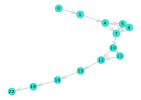

In [241]:
using LightGraphs, SimpleWeightedGraphs,GraphPlot
function slurp(A)
    goal = maximum(A) + 3
    #println(A)
    push!(A,0)
    push!(A,goal)
    sort!(A)
    #println(A)
    
    G = SimpleWeightedDiGraph(length(A))
    for i ∈ 1:length(A)
        if (A[i]+1) in A
           j = findfirst(isequal(A[i]+1), A)
           #println(A[i]+1)
           add_edge!(G,i,j,1)
        end
        if (A[i]+2) in A
           j = findfirst(isequal(A[i]+2), A)
           #println(A[i]+2)
           add_edge!(G,i,j,1)
        end    
        if (A[i]+3) in A
           #println(A[i]+3)
            j = findfirst(isequal(A[i]+3), A)
           add_edge!(G,i,j,1)
        end
    end
    (G,A)
end
(G,A) = slurp([16,10,15,5,1,11,7,19,6,12,4])
vertices(G)
gplot(G,nodelabel=A)
#findfirst(isequal(1), test1)

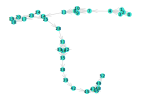

In [238]:
test2=[28,33,18,42,31,14,46,20,48,47,24,23,49,45,19,38,39,11,1,32,25,35,8,17,7,9,4,2,34,10,3]
(G,A) = slurp(test2)
vertices(G)
gplot(G,nodelabel=A)

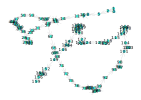

In [213]:
input = readdlm("input.txt",Int)
(G,A) = slurp(input[:,1])
vertices(G)
gplot(G,nodelabel=A)

In [313]:
sum([1,2,3])

6

total: 24179327893504
  0.066987 seconds (52.67 k allocations: 3.007 MiB, 32.83% gc time)


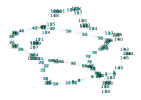

In [419]:
memo = Dict{Int,Int}()

function count_paths_from(A,i) 
    if i > length(A) - 3
        return 1
    end
    
    if get(memo,i,0) != 0 
       return memo[i] 
    end
    
    total = 0
    for j ∈ [1,2,3]
        if A[i+j] - A[i] <= 3 
           total = total + count_paths_from(A,i+j) 
        end
    end
    memo[i] = total
    total
end

#(G,A) = slurp([16,10,15,5,1,11,7,19,6,12,4])
input = readdlm("input.txt",Int)
(G,A) = slurp(input[:,1])
memo = Dict{Int,Int}()
@time println("total: ",count_paths_from(A,1))
gplot(G,nodelabel=A)


total: 19208


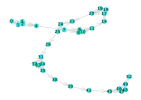

In [414]:
test2=[28,33,18,42,31,14,46,20,48,47,24,23,49,45,19,38,39,11,1,32,25,35,8,17,7,9,4,2,34,10,3]
(G,A) = slurp(test2)
memo = Dict{Int,Int}()
println("total: ",count_paths_from(A,1))
gplot(G,nodelabel=A)

total: 24179327893504
  0.000273 seconds (405 allocations: 21.938 KiB)


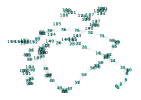

In [418]:
input = readdlm("input.txt",Int)
(G,A) = slurp(input[:,1])
memo = Dict{Int,Int}()
@time println("total: ",count_paths_from(A,1))
gplot(G,nodelabel=A)